#Improting the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the Dataset


In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Data Exploring

Checking Missing Values

In [5]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


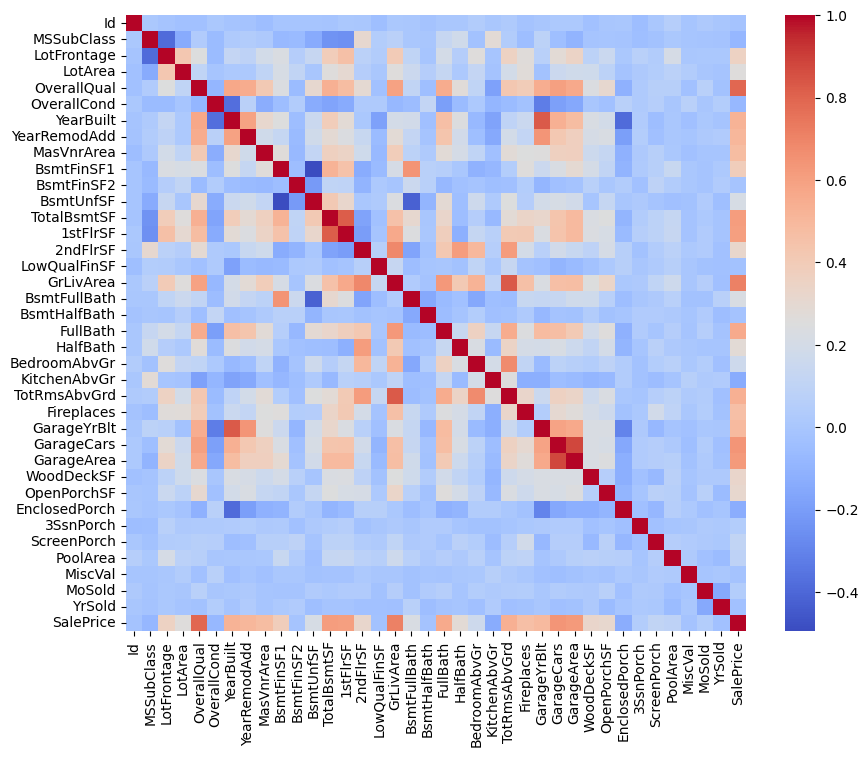

In [6]:
numeric_train = train.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_train.corr(), cmap="coolwarm", annot=False)
plt.show()

#Data Preprocessing

Importing Essentials

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Defining features and targets

In [8]:
X = train.drop(columns=["SalePrice", "Id"])
y = train["SalePrice"]

Identify numerical and categorical columns

In [9]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

Preprocessing pipeline

In [10]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [11]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [12]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Transformations

In [14]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#Model Training and Evaluation

In [15]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ['PYTHONWARNINGS'] = 'ignore'

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

In [18]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R² Score": r2}

In [19]:
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print(results_df)

                           RMSE           MAE  R² Score
XGBoost            25633.549267  16046.147461  0.914335
Gradient Boosting  26503.771884  16555.666542  0.908420
Random Forest      28432.111903  17408.137192  0.894609
LightGBM           29390.466694  16997.387816  0.887384
Linear Regression  29473.873055  18287.698623  0.886744
Neural Network     31626.743392  18723.917396  0.869595
Decision Tree      39570.461696  27674.445232  0.795860


RMSE Plot

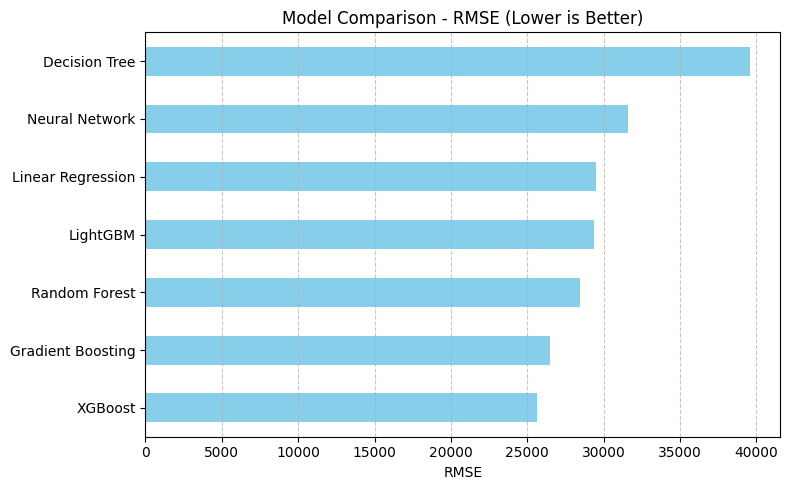

In [20]:
results_df["RMSE"].sort_values().plot(kind="barh", color="skyblue", figsize=(8, 5))
plt.title("Model Comparison - RMSE (Lower is Better)")
plt.xlabel("RMSE")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

R² Score Plot

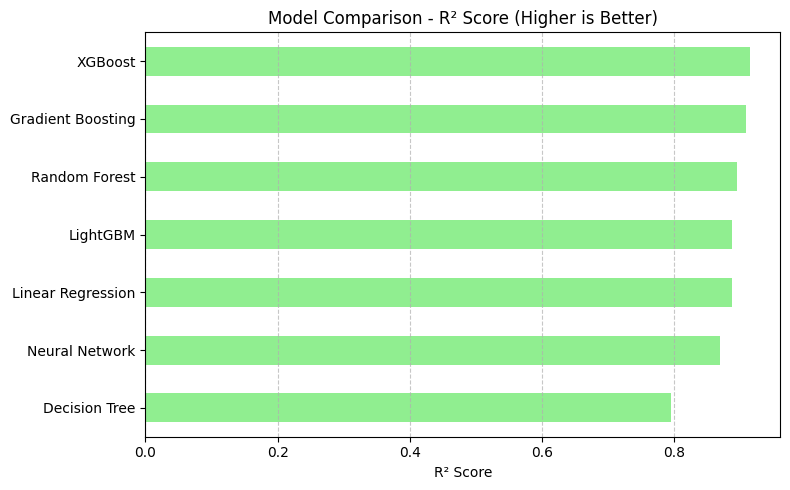

In [21]:
results_df["R² Score"].sort_values().plot(kind="barh", color="lightgreen", figsize=(8, 5))
plt.title("Model Comparison - R² Score (Higher is Better)")
plt.xlabel("R² Score")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
import os
import pickle
from xgboost import XGBRegressor

# Train the best model
best_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
best_model.fit(X_train, y_train)

# Create folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the model
with open("models/model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as model.pkl")


Model saved as model.pkl
